In [20]:
### Housekeeping ###
import os

### Data ###
import numpy as np
import pandas as pd
import scipy.io

### Visualization ###
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Machine Learning ###
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Statistics ###
import scipy.stats as stats
import statsmodels.stats.multitest as smm

### RNA-Seq ###
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

import gseapy as gp
from gseapy.plot import gseaplot

In [21]:
dir = os.path.join('..', 'data', 'E-GEOD-60052.csv')
df = pd.read_csv(dir, index_col=0)
df

,condition,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
SRR1797218,normal,99,51,33,67,39,128,597,20,171,...,0,0,0,0,0,0,0,0,0,0
SRR1797219,normal,33,2,52,141,110,419,454,57,198,...,0,0,0,0,0,0,0,0,0,0
SRR1797220,normal,14,26,11,45,28,197,473,17,90,...,0,0,0,0,0,6,0,0,0,0
SRR1797221,normal,14,13,0,23,52,76,65,14,30,...,0,0,0,0,0,0,0,1,0,0
SRR1797222,normal,48,0,12,183,53,314,134,60,299,...,0,0,0,0,0,6,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1797299,small cell lung carcinoma,85,58,147,117,127,0,222,196,221,...,0,0,0,0,0,12,0,3,0,0
SRR1797300,small cell lung carcinoma,42,85,18,18,41,241,756,9,195,...,0,0,0,0,0,0,0,0,0,0
SRR1797301,small cell lung carcinoma,49,4,121,167,224,47,466,57,444,...,0,0,0,0,0,32,0,0,0,0
SRR1797302,small cell lung carcinoma,109,0,66,27,100,139,583,70,139,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df = df.loc[:,~df.columns.duplicated()].copy()
df

,condition,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
SRR1797218,normal,99,51,33,67,39,128,597,20,171,...,0,0,0,0,0,0,0,0,0,0
SRR1797219,normal,33,2,52,141,110,419,454,57,198,...,0,0,0,0,0,0,0,0,0,0
SRR1797220,normal,14,26,11,45,28,197,473,17,90,...,0,0,0,0,0,6,0,0,0,0
SRR1797221,normal,14,13,0,23,52,76,65,14,30,...,0,0,0,0,0,0,0,1,0,0
SRR1797222,normal,48,0,12,183,53,314,134,60,299,...,0,0,0,0,0,6,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1797299,small cell lung carcinoma,85,58,147,117,127,0,222,196,221,...,0,0,0,0,0,12,0,3,0,0
SRR1797300,small cell lung carcinoma,42,85,18,18,41,241,756,9,195,...,0,0,0,0,0,0,0,0,0,0
SRR1797301,small cell lung carcinoma,49,4,121,167,224,47,466,57,444,...,0,0,0,0,0,32,0,0,0,0
SRR1797302,small cell lung carcinoma,109,0,66,27,100,139,583,70,139,...,0,0,0,0,0,0,0,0,0,0


In [24]:
meta_df = df['condition'].reset_index().rename(columns={'index':'sample'})
meta_df = meta_df.set_index('sample').rename_axis(None)
meta_df

,condition
SRR1797218,normal
SRR1797219,normal
SRR1797220,normal
SRR1797221,normal
SRR1797222,normal
...,...
SRR1797299,small cell lung carcinoma
SRR1797300,small cell lung carcinoma
SRR1797301,small cell lung carcinoma
SRR1797302,small cell lung carcinoma


In [25]:
df = df.drop(columns=['condition'])
df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
SRR1797218,99,51,33,67,39,128,597,20,171,153,...,0,0,0,0,0,0,0,0,0,0
SRR1797219,33,2,52,141,110,419,454,57,198,155,...,0,0,0,0,0,0,0,0,0,0
SRR1797220,14,26,11,45,28,197,473,17,90,147,...,0,0,0,0,0,6,0,0,0,0
SRR1797221,14,13,0,23,52,76,65,14,30,11,...,0,0,0,0,0,0,0,1,0,0
SRR1797222,48,0,12,183,53,314,134,60,299,133,...,0,0,0,0,0,6,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1797299,85,58,147,117,127,0,222,196,221,642,...,0,0,0,0,0,12,0,3,0,0
SRR1797300,42,85,18,18,41,241,756,9,195,184,...,0,0,0,0,0,0,0,0,0,0
SRR1797301,49,4,121,167,224,47,466,57,444,266,...,0,0,0,0,0,32,0,0,0,0
SRR1797302,109,0,66,27,100,139,583,70,139,212,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(86, 65217)

In [27]:
genes_to_keep = df.columns[df.sum(axis=0) >= 10]
len(genes_to_keep)

56016

In [28]:
filtered_df = df[genes_to_keep]
filtered_df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000281896,LINC02246,ENSG00000281904,ENSG00000281905,HERC2P7.1,SNORA50A.1,LINC01144,ENSG00000281918,ENSG00000281920,ENSG00000281921
SRR1797218,99,51,33,67,39,128,597,20,171,153,...,6,9,6,0,0,0,1,0,0,0
SRR1797219,33,2,52,141,110,419,454,57,198,155,...,79,15,31,0,2,25,0,0,0,0
SRR1797220,14,26,11,45,28,197,473,17,90,147,...,15,0,9,0,0,0,0,6,0,0
SRR1797221,14,13,0,23,52,76,65,14,30,11,...,13,0,135,0,0,0,0,0,1,0
SRR1797222,48,0,12,183,53,314,134,60,299,133,...,65,0,38,0,0,7,0,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1797299,85,58,147,117,127,0,222,196,221,642,...,19,0,37,0,0,6,26,12,3,0
SRR1797300,42,85,18,18,41,241,756,9,195,184,...,15,3,3,0,0,2,0,0,0,0
SRR1797301,49,4,121,167,224,47,466,57,444,266,...,46,0,75,0,2,0,13,32,0,0
SRR1797302,109,0,66,27,100,139,583,70,139,212,...,24,0,75,0,0,0,0,0,0,0


In [29]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=df,
    metadata=meta_df,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [30]:
dds

AnnData object with n_obs × n_vars = 86 × 65217
    obs: 'condition'
    obsm: 'design_matrix'

In [31]:
dds.deseq2()

Fitting size factors...
... done in 0.09 seconds.

Fitting dispersions...
... done in 4.17 seconds.

Fitting dispersion trend curve...
... done in 1.05 seconds.

Fitting MAP dispersions...
... done in 4.41 seconds.

Fitting LFCs...
... done in 3.57 seconds.

Refitting 3111 outliers.

Fitting dispersions...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 0.25 seconds.

Fitting LFCs...
... done in 0.22 seconds.

/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [32]:
dds

AnnData object with n_obs × n_vars = 86 × 65217
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [33]:
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition small cell lung carcinoma vs normal
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6            50.068813        0.186334  0.412251  0.451991  0.651276   
TNMD               6.722537       -1.378788  1.111712 -1.240239  0.214887   
DPM1              38.271571        0.624634  0.422328  1.479025  0.139134   
SCYL3            106.323251        0.600443  0.258667  2.321295  0.020271   
C1orf112         122.884403        1.117855  0.351354  3.181562  0.001465   
...                     ...             ...       ...       ...       ...   
ENSG00000281918    7.537101        2.352306  0.964029  2.440079  0.014684   
ENSG00000281919    0.000000             NaN       NaN       NaN       NaN   
ENSG00000281920    9.557405        3.829074  1.430825  2.676129  0.007448   
ENSG00000281921    0.719867        2.229193  3.400970  0.655458  0.512173   
ENSG00000281922    0.000000             NaN       NaN       NaN      

... done in 1.81 seconds.



In [34]:
results = stat_res.results_df
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,50.068813,0.186334,0.412251,0.451991,0.651276,0.815979
TNMD,6.722537,-1.378788,1.111712,-1.240239,0.214887,0.422666
DPM1,38.271571,0.624634,0.422328,1.479025,0.139134,0.319629
SCYL3,106.323251,0.600443,0.258667,2.321295,0.020271,0.087005
C1orf112,122.884403,1.117855,0.351354,3.181562,0.001465,0.013681
...,...,...,...,...,...,...
ENSG00000281918,7.537101,2.352306,0.964029,2.440079,0.014684,0.069911
ENSG00000281919,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000281920,9.557405,3.829074,1.430825,2.676129,0.007448,0.043905
ENSG00000281921,0.719867,2.229193,3.400970,0.655458,0.512173,NaN


In [35]:
results = results[(results['padj'] < 0.05)]
results = results[(abs(results['log2FoldChange']) > 0.05)]
results = results[(results['baseMean'] > 20)]
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
C1orf112,122.884403,1.117855,0.351354,3.181562,0.001465,0.013681
FGR,55.528507,-2.368954,0.576093,-4.112105,0.000039,0.000900
STPG1,86.443931,1.000003,0.338278,2.956154,0.003115,0.023684
MYH16,49.771122,1.938114,0.675608,2.868698,0.004122,0.028888
CD99,205.021743,-1.877996,0.489489,-3.836647,0.000125,0.002217
...,...,...,...,...,...,...
ENSG00000280783,26.814512,1.791200,0.519264,3.449501,0.000562,0.006823
LINC00294,175.706382,0.808593,0.276039,2.929269,0.003398,0.025166
LINC00997,177.999021,0.975662,0.292882,3.331246,0.000865,0.009264
LINC00506,2091.780524,1.252806,0.476021,2.631827,0.008493,0.047939


In [36]:
results.sort_values(by=['log2FoldChange'], ascending=False, inplace=True)
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
HNRNPA1P42,27.615679,7.679569,1.482099,5.181550,2.200499e-07,1.581557e-05
PABPC1P11,32.590847,7.503462,1.215853,6.171359,6.770569e-10,1.806902e-07
POLR3GP2,21.844447,7.330169,1.703677,4.302558,1.688376e-05,4.764404e-04
FAM83A,20.423203,7.233236,1.482740,4.878289,1.070103e-06,5.649392e-05
THEG,22.237465,6.950658,1.370182,5.072798,3.920092e-07,2.515929e-05
...,...,...,...,...,...,...
SFTPA1,1822.220830,-4.748982,0.898820,-5.283576,1.266862e-07,1.050671e-05
SFTPA2,2831.561330,-4.798173,0.906014,-5.295915,1.184220e-07,9.968003e-06
PGC,108.757986,-4.935291,0.707069,-6.979933,2.953201e-12,2.904853e-09
ADAMTS7P3,51.561853,-4.970657,0.993212,-5.004630,5.596948e-07,3.362759e-05


In [37]:
top50 = results.head(50)
bot50 = results.tail(50)
de_res = pd.concat([top50, bot50])
de_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
HNRNPA1P42,27.615679,7.679569,1.482099,5.181550,2.200499e-07,1.581557e-05
PABPC1P11,32.590847,7.503462,1.215853,6.171359,6.770569e-10,1.806902e-07
POLR3GP2,21.844447,7.330169,1.703677,4.302558,1.688376e-05,4.764404e-04
FAM83A,20.423203,7.233236,1.482740,4.878289,1.070103e-06,5.649392e-05
THEG,22.237465,6.950658,1.370182,5.072798,3.920092e-07,2.515929e-05
...,...,...,...,...,...,...
SFTPA1,1822.220830,-4.748982,0.898820,-5.283576,1.266862e-07,1.050671e-05
SFTPA2,2831.561330,-4.798173,0.906014,-5.295915,1.184220e-07,9.968003e-06
PGC,108.757986,-4.935291,0.707069,-6.979933,2.953201e-12,2.904853e-09
ADAMTS7P3,51.561853,-4.970657,0.993212,-5.004630,5.596948e-07,3.362759e-05


In [38]:
dds.layers['normed_counts']

array([[ 71.88899909,  37.03372681,  23.9629997 , ...,   0.        ,
          0.        ,   0.        ],
       [ 21.67894892,   1.31387569,  34.16076799, ...,   0.        ,
          0.        ,   0.        ],
       [ 14.54176963,  27.0061436 ,  11.42567614, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 25.53157327,   2.08421006,  63.04735439, ...,   0.        ,
          0.        ,   0.        ],
       [110.33636141,   0.        ,  66.80917296, ...,   0.        ,
          0.        ,   0.        ],
       [  1.91799834,  22.05698096,  10.54899089, ...,   0.        ,
          0.        ,   0.        ]])

In [39]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p']

array([[4.28893772, 3.63847331, 3.21739472, ..., 0.        , 0.        ,
        0.        ],
       [3.12143713, 0.83892391, 3.55993092, ..., 0.        , 0.        ,
        0.        ],
       [2.74353121, 3.3324239 , 2.51976499, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.27833547, 1.12629557, 4.15962272, ..., 0.        , 0.        ,
        0.        ],
       [4.7125559 , 0.        , 4.21669748, ..., 0.        , 0.        ,
        0.        ],
       [1.07089788, 3.13796859, 2.44659806, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
dds_sigs = dds[:, de_res.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 86 × 100
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [41]:
dds_sigs.obs_names

Index(['SRR1797218', 'SRR1797219', 'SRR1797220', 'SRR1797221', 'SRR1797222',
       'SRR1797223', 'SRR1797224', 'SRR1797225', 'SRR1797226', 'SRR1797227',
       'SRR1797228', 'SRR1797229', 'SRR1797230', 'SRR1797231', 'SRR1797232',
       'SRR1797233', 'SRR1797234', 'SRR1797235', 'SRR1797236', 'SRR1797237',
       'SRR1797238', 'SRR1797239', 'SRR1797240', 'SRR1797241', 'SRR1797242',
       'SRR1797243', 'SRR1797244', 'SRR1797245', 'SRR1797246', 'SRR1797247',
       'SRR1797248', 'SRR1797249', 'SRR1797250', 'SRR1797251', 'SRR1797252',
       'SRR1797253', 'SRR1797254', 'SRR1797255', 'SRR1797256', 'SRR1797257',
       'SRR1797258', 'SRR1797259', 'SRR1797260', 'SRR1797261', 'SRR1797262',
       'SRR1797263', 'SRR1797264', 'SRR1797265', 'SRR1797266', 'SRR1797267',
       'SRR1797268', 'SRR1797269', 'SRR1797270', 'SRR1797271', 'SRR1797272',
       'SRR1797273', 'SRR1797274', 'SRR1797275', 'SRR1797276', 'SRR1797277',
       'SRR1797278', 'SRR1797279', 'SRR1797280', 'SRR1797281', 'SRR1797282',

In [42]:
de_df = pd.DataFrame(dds_sigs.layers['log1p'].T,
                     index=dds_sigs.var_names,
                     columns=dds_sigs.obs_names)
de_df

,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,...,SRR1797294,SRR1797295,SRR1797296,SRR1797297,SRR1797298,SRR1797299,SRR1797300,SRR1797301,SRR1797302,SRR1797303
HNRNPA1P42,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.146542,0.000000,0.000000,...,4.383740,2.031962,0.000000,0.000000,3.137331,3.114104,0.000000,2.956827,0.000000,0.000000
PABPC1P11,0.000000,0.000000,0.000000,0.000000,0.000000,0.380133,0.000000,2.698084,0.000000,3.450909,...,3.657647,0.000000,0.000000,3.159380,2.325032,3.668600,0.000000,3.777950,0.000000,0.000000
POLR3GP2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480628,0.000000,0.000000,...,4.264711,4.452622,1.978265,0.669402,2.162077,0.000000,0.000000,2.603079,0.000000,0.000000
FAM83A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.312122,0.000000,1.708889,...,5.012510,3.361832,1.414662,0.669402,3.180863,0.363980,1.007677,1.826245,3.862076,0.000000
THEG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383674,1.987329,0.000000,0.000000,...,4.405936,0.000000,0.000000,1.264556,4.840952,2.406770,0.000000,4.281988,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SFTPA1,8.823603,10.201369,9.771139,8.701313,9.900541,8.424192,10.262053,5.991884,5.880835,0.000000,...,3.827865,7.396592,8.910830,0.000000,3.044134,5.654248,7.596814,6.672532,7.918360,7.266036
SFTPA2,9.256262,10.784106,10.108535,9.062530,10.338351,8.721593,10.699148,6.332578,4.958326,1.600895,...,3.560275,7.555638,9.641243,1.635100,3.565156,5.706673,7.676774,7.165688,8.728719,7.308036
PGC,5.424215,7.410070,7.398048,6.675052,6.230596,6.155584,7.344143,3.986881,3.820752,0.000000,...,4.567721,2.330264,5.014126,0.000000,2.219397,3.053818,4.047168,3.921973,4.274695,1.756995
ADAMTS7P3,5.170498,5.651777,5.758157,6.788514,6.711190,5.046441,6.417126,0.000000,4.162593,0.000000,...,3.560275,3.771055,5.546886,0.951059,1.115288,0.000000,0.000000,3.901121,2.313559,0.000000


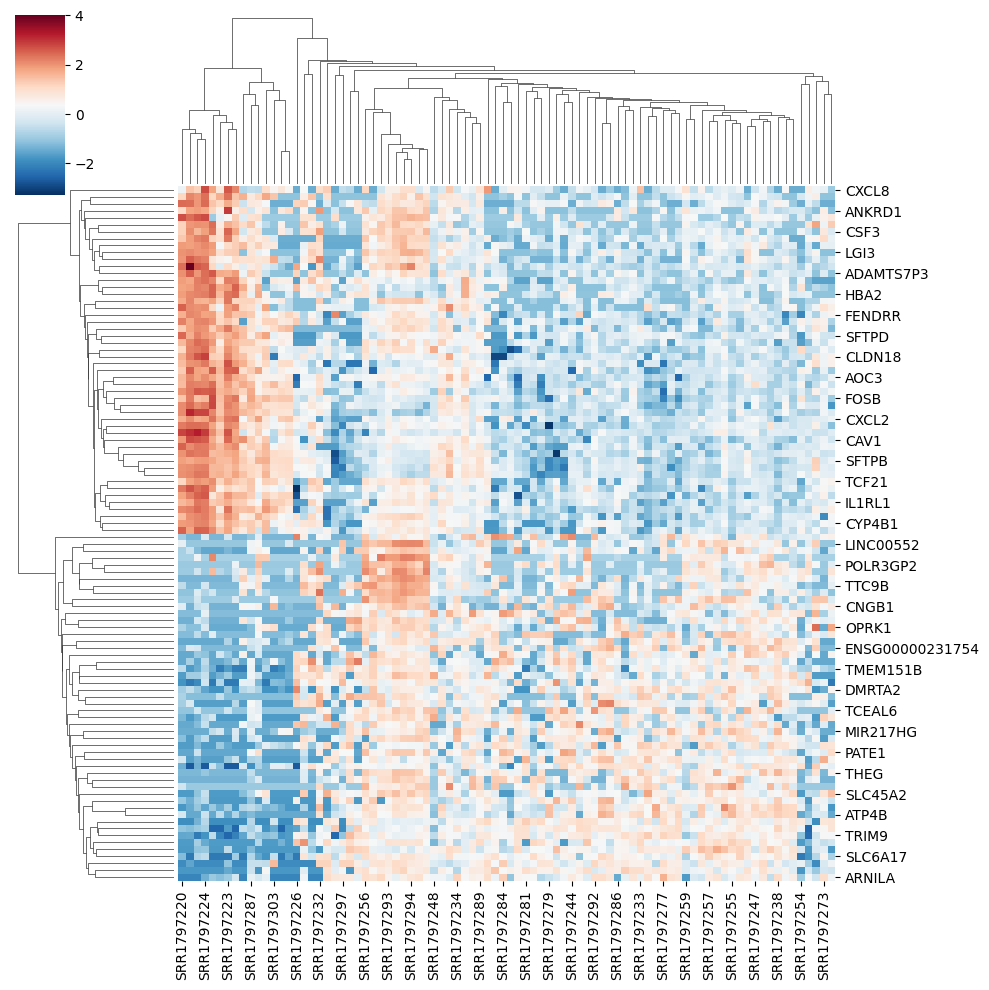

In [43]:
sns.clustermap(de_df, z_score=0, cmap='RdBu_r')